In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [52]:
# Load the data
current_dir = os.getcwd() # get the current work directory
file_name = "data.csv"
file_path = current_dir + "\\" + file_name # path to the file
cancer_data = pd.read_csv(file_path) # read a cvs file
cancer_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


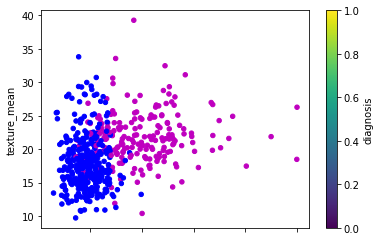

In [53]:
# Plot the distribution of the two classes MAlign and benign 
cancer_data.plot.scatter(x = "area_mean", y = "texture_mean", c = "diagnosis", colormap='jet')
# the dataset is not linearly separable

In [54]:
# another alternative is to use the sklearn

from sklearn.model_selection import train_test_split

In [55]:
data_train, data_test = train_test_split(cancer_data, test_size=0.33, random_state=42)
data_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
172,87164,M,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,...,17.04,125.00,1102.0,0.15310,0.3583,0.5830,0.18270,0.3216,0.10100,NaN
407,905190,B,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,...,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151,NaN
56,857637,M,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,...,28.14,170.10,2145.0,0.16240,0.3511,0.3879,0.20910,0.3537,0.08294,NaN
497,914580,B,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,...,24.34,92.82,607.3,0.12760,0.2506,0.2028,0.10530,0.3035,0.07661,NaN
301,892604,B,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,...,23.07,88.13,551.3,0.10500,0.2158,0.1904,0.07625,0.2685,0.07764,NaN


In [56]:
X_train = data_train[["area_mean", "texture_mean"]].to_numpy()
Y_train = data_train["diagnosis"] 
X_test = data_test[["area_mean", "texture_mean"] ].to_numpy()
Y_test = data_test["diagnosis"]
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y_train_encoded = encoder.fit_transform(Y_train)
Y_test_encoded = encoder.fit_transform(Y_test)

In [57]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scalerTraining = MinMaxScaler()
scalerTesting = MinMaxScaler()
scalerTraining.fit(X_train)
scalerTesting.fit(X_test)
X_train_norm = scalerTraining.transform(X_train)
X_test_norm = scalerTesting.transform(X_test) 

In [58]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(X_train, Y_train_encoded )


DecisionTreeClassifier(max_depth=4)

In [59]:
def plotDecisionTree(X, Y, clf, xlabel, ylabel):    # Plot the decision boundary
    
    plt.figure(figsize=(20,10))

    x_min, x_max = X[:, 0].min() - 0.01 , X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plot the data points
    plt.scatter(X[:, 0], X[:, 1], c = Y, cmap=plt.cm.RdYlBu, s=45)

    plt.show()

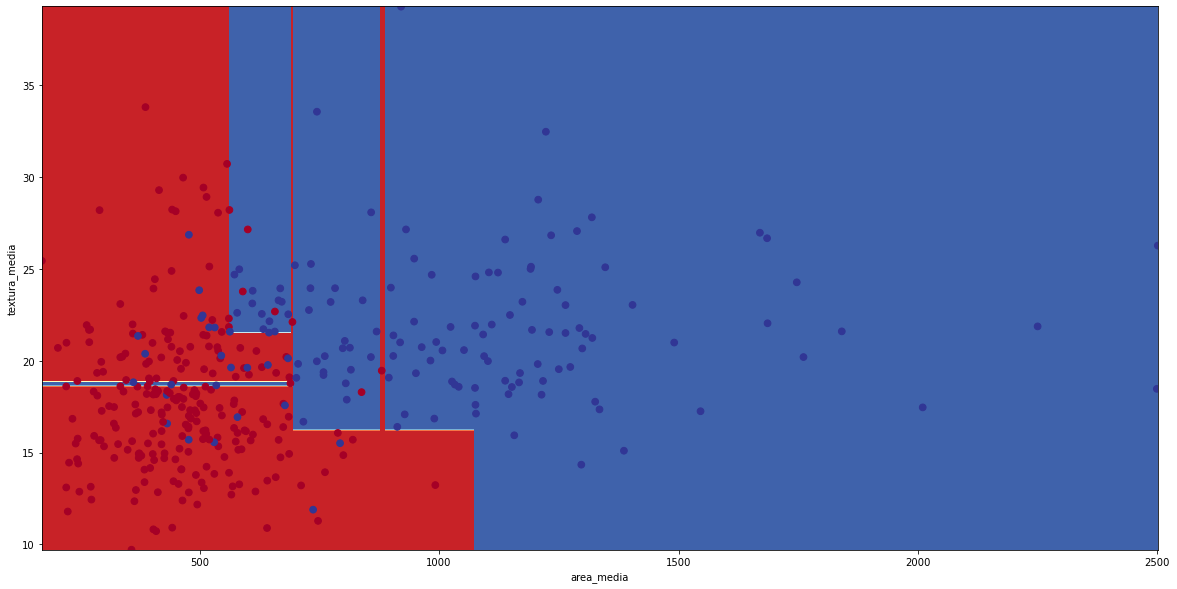

In [60]:
plotDecisionTree(X_train, Y_train_encoded,decision_tree, "area_media", "textura_media"  )

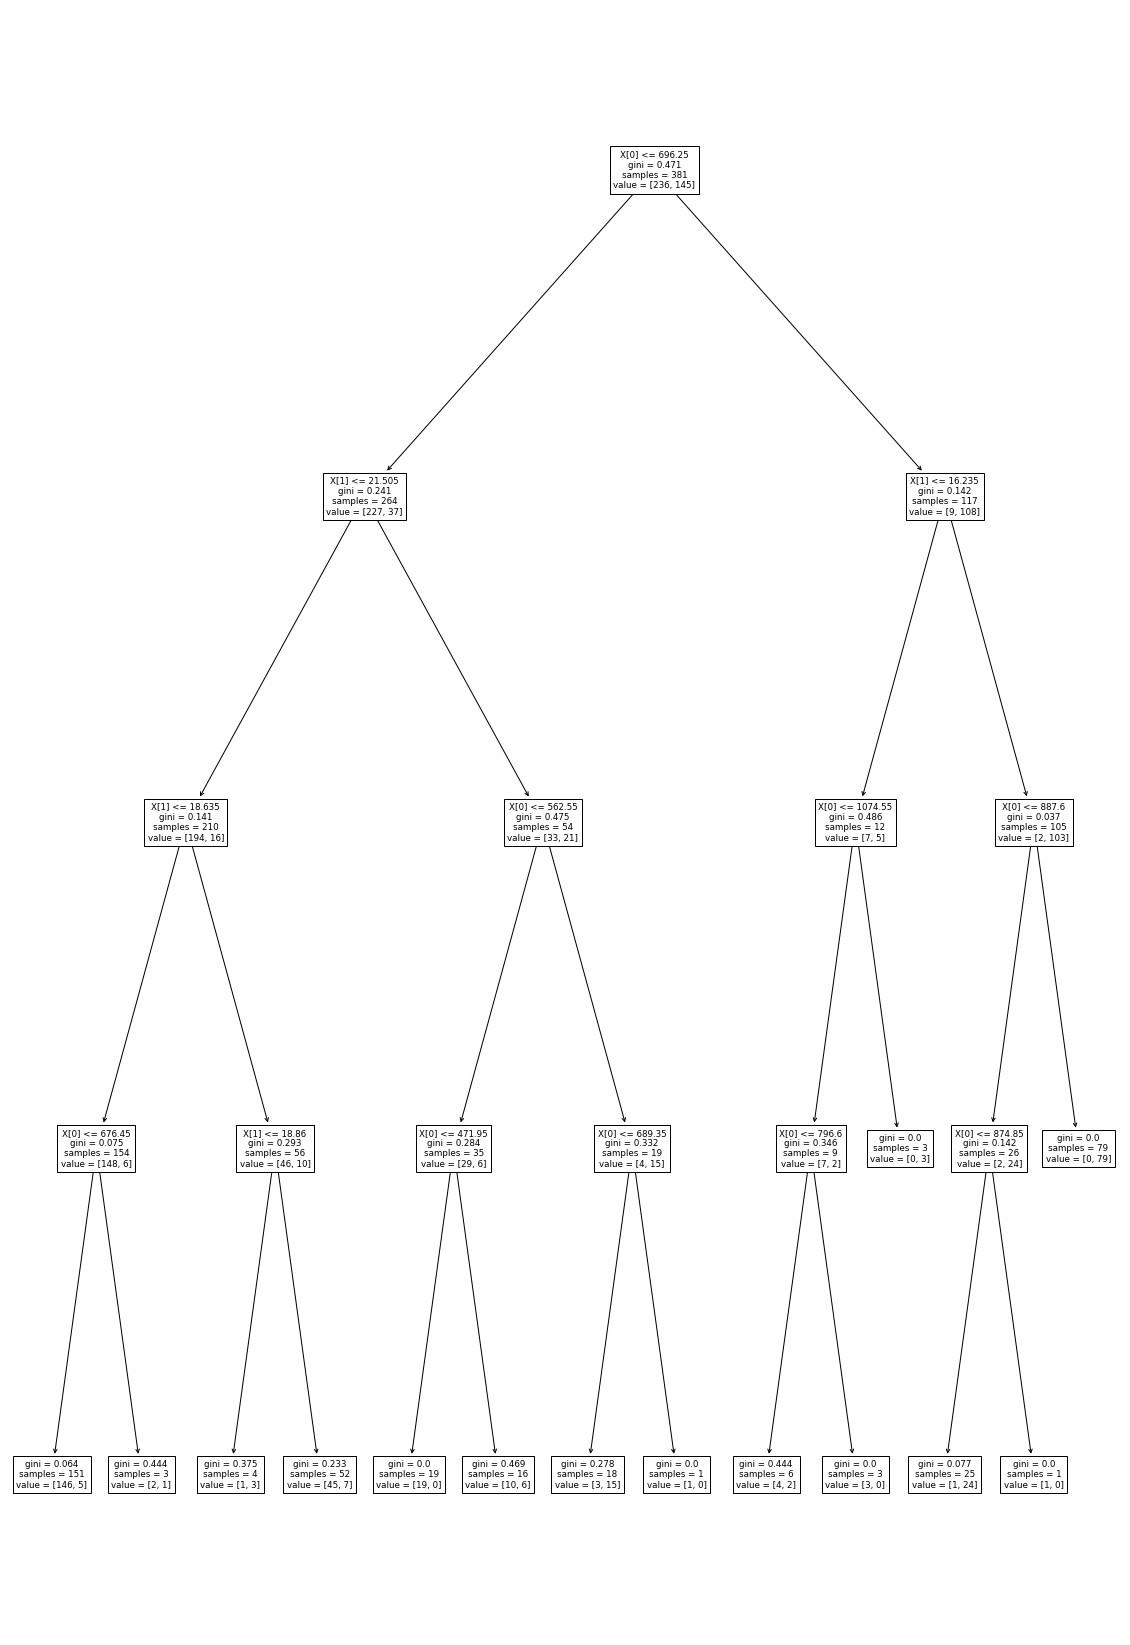

In [61]:
from sklearn.tree import plot_tree

plt.figure( figsize=(20,30))
plot_tree(decision_tree)
plt.show()